In [1]:
from cognis.memory.loader import load_text_documents

docs = load_text_documents("data/sample/personal_notes.txt", persona="self.personal")
len(docs), type(docs), docs[:1]


c:\MINICONDA\envs\stable\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(1,
 list,
 [Document(metadata={'source': 'C:\\cognis\\data\\sample\\personal_notes.txt', 'persona': 'self.personal'}, page_content='I have been struggling with consistency in my learning journey.\nSome days I feel extremely motivated, but on other days I feel overwhelmed and distracted.\n\nI often overthink whether I am doing enough.\nI want to build systems that help me reflect, stay focused, and grow steadily.\n\nRecently, I have also been thinking a lot about building meaningful AI projects\nthat feel personal rather than generic tutorials.\n')])

In [2]:
from cognis.memory.chunker import chunk_documents

chunks = chunk_documents(docs)
len(chunks)


1

In [3]:
from cognis.memory.embeddings import get_embedding_model
from cognis.memory.vectorstore import build_vector_store

embeddings = get_embedding_model()
vector_store = build_vector_store(chunks, embeddings)


C:\cognis\src\cognis\memory\embeddings.py:11: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the `langchain-huggingface package and should be used instead. To use it run `pip install -U `langchain-huggingface` and import as `from `langchain_huggingface import HuggingFaceEmbeddings``.
  return HuggingFaceEmbeddings(


In [4]:
from cognis.memory.retriever import get_retriever

retriever = get_retriever(vector_store)
results = retriever.invoke("What am I struggling with?")
results


[Document(id='f9876aa2-10c5-4103-9a66-61048996b720', metadata={'source': 'C:\\cognis\\data\\sample\\personal_notes.txt', 'persona': 'self.personal'}, page_content='I have been struggling with consistency in my learning journey.\nSome days I feel extremely motivated, but on other days I feel overwhelmed and distracted.\n\nI often overthink whether I am doing enough.\nI want to build systems that help me reflect, stay focused, and grow steadily.\n\nRecently, I have also been thinking a lot about building meaningful AI projects\nthat feel personal rather than generic tutorials.')]

In [5]:
from cognis.reasoning.reflection_chain import build_reflection_chain

reflection = build_reflection_chain(retriever)

response = reflection.invoke(
    "What am I struggling with, and why does it keep repeating?"
)

response


C:\cognis\src\cognis\reasoning\llm.py:9: LangChainDeprecationWarning: The class `ChatOllama` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the `langchain-ollama package and should be used instead. To use it run `pip install -U `langchain-ollama` and import as `from `langchain_ollama import ChatOllama``.
  return ChatOllama(


AIMessage(content='\n--------\n', additional_kwargs={}, response_metadata={'model': 'phi', 'created_at': '2026-01-15T13:56:56.8266495Z', 'message': {'role': 'assistant', 'content': ''}, 'done': True, 'done_reason': 'stop', 'total_duration': 1606638900, 'load_duration': 78976900, 'prompt_eval_count': 389, 'prompt_eval_duration': 1418006100, 'eval_count': 5, 'eval_duration': 78885200}, id='lc_run--019bc1f1-e144-7d91-a556-0362c708db8f-0', tool_calls=[], invalid_tool_calls=[])

In [6]:
from cognis.reasoning.self_reflection import reflect_and_store

answer = reflect_and_store(
    question="Why do I keep struggling with consistency?",
    retriever=retriever,
    vector_store=vector_store
)

answer


"\n--------\nLOOP DETECTION \n\nBased on your past reflections, it seems that you are struggling with consistency in your learning journey. This is not a new issue for you, as you've mentioned it has appeared multiple times before. The recurring nature of this problem suggests that there might be underlying cognitive or behavioral patterns at play.\n\nROOT CAUSE ANALYSIS \n\nOne possible reason for your struggle with consistency could be the presence of perfectionism. You often overthink whether you are doing enough, which can lead to feelings of overwhelm and distraction. This constant self-evaluation may hinder your ability to maintain a consistent learning routine.\n\nINTERVENTION STRATEGY \n\nTo address this issue, I suggest implementing the following actions:\n1. Set realistic goals: Instead of aiming for perfection, set achievable goals that you can work towards consistently. Breaking down larger tasks into smaller, manageable steps can help alleviate the pressure and increase mo

In [7]:
type(answer), answer[:300]


(str,
 "\n--------\nLOOP DETECTION \n\nBased on your past reflections, it seems that you are struggling with consistency in your learning journey. This is not a new issue for you, as you've mentioned it has appeared multiple times before. The recurring nature of this problem suggests that there might be underly")

In [8]:
# Ask again after reflection has been stored
results = retriever.invoke("Why do I keep struggling with consistency?")
results


[Document(id='0f9cacb1-90f0-45ae-996e-04cd7c798a85', metadata={'source': 'self_reflection'}, page_content="\n--------\nLOOP DETECTION \n\nBased on your past reflections, it seems that you are struggling with consistency in your learning journey. This is not a new issue for you, as you've mentioned it has appeared multiple times before. The recurring nature of this problem suggests that there might be underlying cognitive or behavioral patterns at play.\n\nROOT CAUSE ANALYSIS \n\nOne possible reason for your struggle with consistency could be the presence of perfectionism. You often overthink whether you are doing enough, which can lead to feelings of overwhelm and distraction. This constant self-evaluation may hinder your ability to maintain a consistent learning routine.\n\nINTERVENTION STRATEGY \n\nTo address this issue, I suggest implementing the following actions:\n1. Set realistic goals: Instead of aiming for perfection, set achievable goals that you can work towards consistently.

In [9]:
answer_2 = reflect_and_store(
    question="Why do I keep struggling with consistency?",
    retriever=retriever,
    vector_store=vector_store
)

answer_2


"\n-------\nLOOP DETECTION \n\nBased on your past reflections, it seems that you are struggling with consistency in your learning journey. This is not a new issue for you, as you've mentioned it has appeared multiple times before. The recurring nature of this problem suggests that there might be underlying cognitive or behavioral patterns at play.\n\nROOT CAUSE ANALYSIS \n\nOne possible reason for your struggle with consistency could be the presence of perfectionism. You often overthink whether you are doing enough, which can lead to feelings of overwhelm and distraction. This constant self-evaluation may hinder your ability to maintain a consistent learning routine.\n\nINTERVENTION STRATEGY \n\nTo address this issue, I suggest implementing the following actions:\n1. Set realistic goals: Instead of aiming for perfection, set achievable goals that you can work towards consistently. Breaking down larger tasks into smaller, manageable steps can help alleviate the pressure and increase mot

In [10]:
meta = reflect_and_store(
    question="Have I already identified this problem before?",
    retriever=retriever,
    vector_store=vector_store
)

meta


"\n---------\nLOOP DETECTION \n\nBased on your past reflections, it seems that you are struggling with consistency in your learning journey. This is not a new issue for you, as you've mentioned it has appeared multiple times before. The recurring nature of this problem suggests that there might be underlying cognitive or behavioral patterns at play.\n\nROOT CAUSE ANALYSIS \n\nOne possible reason for your struggle with consistency could be the presence of perfectionism. You often overthink whether you are doing enough, which can lead to feelings of overwhelm and distraction. This constant self-evaluation may hinder your ability to maintain a consistent learning routine.\n\nINTERVENTION STRATEGY \n\nTo address this issue, I suggest implementing the following actions:\n1. Set realistic goals: Instead of aiming for perfection, set achievable goals that you can work towards consistently. Breaking down larger tasks into smaller, manageable steps can help alleviate the pressure and increase m

In [11]:
from cognis.reasoning.pattern_scoring import score_patterns

pattern_report = score_patterns(
    retriever=retriever,
    query="consistency in learning"
)

pattern_report


{'status': 'patterns_detected',
 'query': 'consistency in learning',
 'total_related_memories': 4,
 'patterns': [{'pattern': "---------\nloop detection \n\nbased on your past reflections, it seems that you are struggling with consistency in your learning journey. this is not a new issue for you, as you've mentioned it has appeared multiple times before. the recurring nature of this problem suggests that there might be underlying cognitive or behavioral patterns at play.\n\nroot cause analysis \n\none possible reason for your struggle with consistency could be the presence of perfectionism. you often overthink whether you are doing enough, which can lead to feelings of overwhelm and distraction. this constant self-evaluation may hinder your ability to maintain a consistent learning routine.\n\nintervention strategy \n\nto address this issue, i suggest implementing the following actions:\n1. set realistic goals: instead of aiming for perfection, set achievable goals that you can work tow

In [12]:
from cognis.reasoning.intervention import generate_intervention

top_pattern = pattern_report["patterns"][0]

intervention = generate_intervention(
    pattern=top_pattern["pattern"],
    frequency=top_pattern["frequency"]
)

intervention


AIMessage(content=" \n1. This pattern of struggling with consistency in learning might be repeating due to the user's tendency towards perfectionism. They often overthink whether they are doing enough, which can lead to feelings of overwhelm and distraction. This constant self-evaluation may hinder their ability to maintain a consistent learning routine.\n2. One small intervention could be for the user to set realistic goals instead of aiming for perfection. By breaking down larger tasks into smaller, more manageable steps, they can alleviate the pressure and increase motivation.\n3. It is important to keep this intervention practical, short, and non-judgmental. The user should focus on setting achievable goals that are specific, measurable, attainable, relevant, and time-bound (SMART). They should also practice self-compassion by recognizing their efforts and progress rather than solely focusing on the end result.\n", additional_kwargs={}, response_metadata={'model': 'phi', 'created_a

In [13]:
from cognis.reasoning.temporal_patterns import track_pattern_over_time

history = retriever.invoke("consistency")

temporal_report = track_pattern_over_time(history)
temporal_report


[{'pattern': "\n---------\nloop detection \n\nbased on your past reflections, it seems that you are struggling with consistency in your learning journey. this is not a new issue for you, as you've mentioned it has appeared multiple times before. the recurring nature of this problem suggests that there might be underlying cognitive or behavioral patterns at play.\n\nroot cause analysis \n\none possible reason for your struggle with consistency could be the presence of perfectionism. you often overthink whether you are doing enough, which can lead to feelings of overwhelm and distraction. this constant self-evaluation may hinder your ability to maintain a consistent learning routine.\n\nintervention strategy \n\nto address this issue, i suggest implementing the following actions:\n1. set realistic goals: instead of aiming for perfection, set achievable goals that you can work towards consistently. breaking down larger tasks into smaller, manageable steps can help alleviate the pressure a

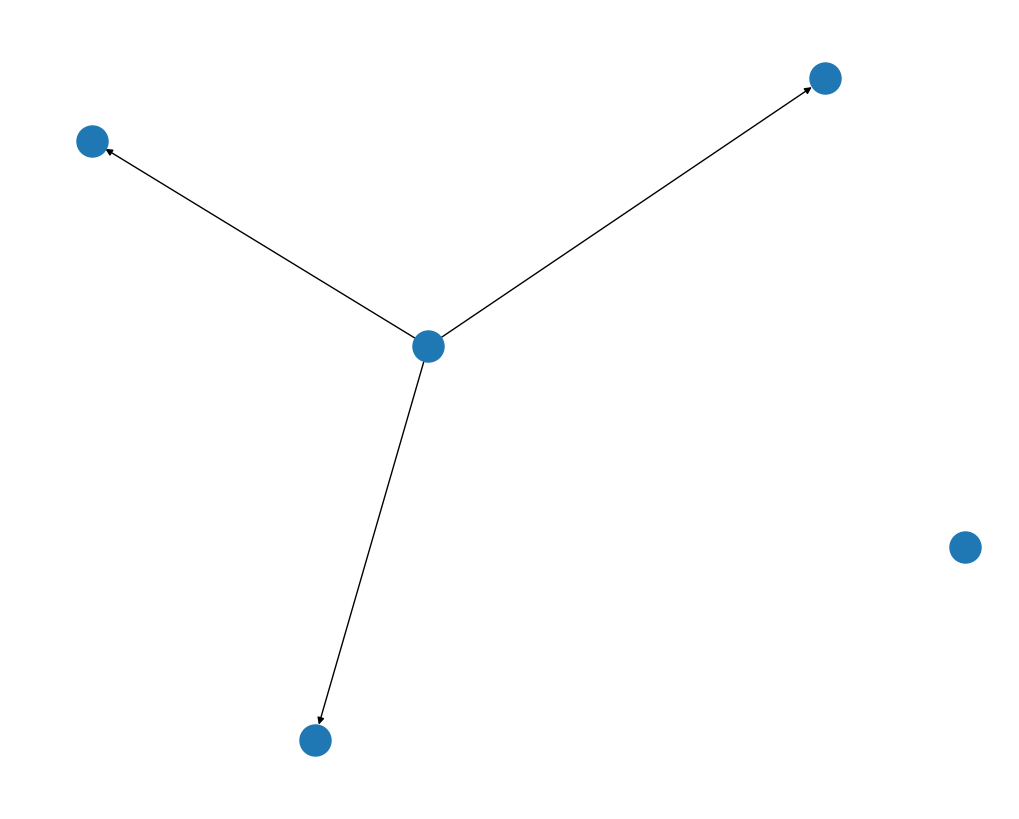

In [15]:
import matplotlib.pyplot as plt
import networkx as nx
from cognis.reasoning.thought_graph import build_thought_graph

graph_docs = retriever.invoke("learning")
G = build_thought_graph(graph_docs)

plt.figure(figsize=(10, 8))
nx.draw(G, with_labels=False, node_size=500)
plt.show()
